In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches as patches
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import simpsom  as sps
from pylettes import *
pylette = Tundra(reverse=True).cmap
from simpsom.plots import scatter_on_map

In [2]:
df = pd.read_csv("../../data/data.csv")
df

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2,0.0,...,0,0,0,1,0,1,0,0,0,1
1,56,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2,1.0,...,0,0,0,1,0,0,1,1,0,0
2,54,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2.0,0,2.0,...,1,0,0,0,0,1,0,1,0,0
3,62,28.0,4.9,17.431477,78.400350,17.451477,78.420350,0.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1
4,60,37.0,4.6,23.359407,85.325055,23.429407,85.395055,0.0,0,1.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37191,63,39.0,4.7,12.323978,76.627961,12.333978,76.637961,0.0,1,0.0,...,1,0,0,0,0,0,1,1,0,0
37192,58,35.0,4.3,13.026286,80.275235,13.136286,80.385235,0.0,0,2.0,...,0,0,1,0,0,1,0,1,0,0
37193,8,34.0,4.9,27.163303,78.057044,27.213303,78.107044,1.0,2,0.0,...,0,0,0,1,0,0,1,1,0,0
37194,45,20.0,4.8,18.593481,73.785901,18.653481,73.845901,1.0,1,1.0,...,0,1,0,0,0,1,0,1,0,0


# SOMs

In [3]:
# !pip install --upgrade simpsom==3.0.0b0

In [4]:
df = df[:10000]

In [5]:
df = df.drop(["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], axis=1)
df

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,Weather conditions_Cloudy,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,37.0,4.9,2.0,2,0.0,0.0,9.0,3.020737,15.0,0,...,0,0,0,1,0,1,0,0,0,1
1,34.0,4.5,3.0,2,1.0,0.0,28.0,20.143737,5.0,0,...,0,0,0,1,0,0,1,1,0,0
2,37.0,4.4,2.0,0,2.0,0.0,37.0,6.198608,5.0,0,...,1,0,0,0,0,1,0,1,0,0
3,28.0,4.9,0.0,1,1.0,0.0,4.0,3.068178,15.0,0,...,0,0,1,0,0,0,1,0,0,1
4,37.0,4.6,0.0,0,1.0,0.0,15.0,10.550013,10.0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31.0,4.7,0.0,2,0.0,0.0,23.0,4.647699,5.0,0,...,1,0,0,0,0,0,1,1,0,0
9996,31.0,4.0,0.0,0,1.0,0.0,20.0,3.099356,10.0,0,...,0,0,1,0,0,1,0,1,0,0
9997,34.0,4.0,1.0,1,1.0,0.0,26.0,6.197259,5.0,0,...,0,0,1,0,0,1,0,1,0,0
9998,36.0,4.8,3.0,2,1.0,0.0,18.0,5139.250364,10.0,0,...,0,0,1,0,0,0,1,1,0,0


In [6]:
df_w_dummies = df
df_w_dummies

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,Weather conditions_Cloudy,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,37.0,4.9,2.0,2,0.0,0.0,9.0,3.020737,15.0,0,...,0,0,0,1,0,1,0,0,0,1
1,34.0,4.5,3.0,2,1.0,0.0,28.0,20.143737,5.0,0,...,0,0,0,1,0,0,1,1,0,0
2,37.0,4.4,2.0,0,2.0,0.0,37.0,6.198608,5.0,0,...,1,0,0,0,0,1,0,1,0,0
3,28.0,4.9,0.0,1,1.0,0.0,4.0,3.068178,15.0,0,...,0,0,1,0,0,0,1,0,0,1
4,37.0,4.6,0.0,0,1.0,0.0,15.0,10.550013,10.0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31.0,4.7,0.0,2,0.0,0.0,23.0,4.647699,5.0,0,...,1,0,0,0,0,0,1,1,0,0
9996,31.0,4.0,0.0,0,1.0,0.0,20.0,3.099356,10.0,0,...,0,0,1,0,0,1,0,1,0,0
9997,34.0,4.0,1.0,1,1.0,0.0,26.0,6.197259,5.0,0,...,0,0,1,0,0,1,0,1,0,0
9998,36.0,4.8,3.0,2,1.0,0.0,18.0,5139.250364,10.0,0,...,0,0,1,0,0,0,1,1,0,0


In [7]:
temp = df.describe()["Time_taken (min)"]
df_fac = pd.cut(
    df["Time_taken (min)"],
    bins=[temp["min"], temp["25%"], temp["50%"], temp["75%"], temp["max"] + 1],
    include_lowest=True,
)
# df["Time_Scale"] = df_fac
# df["Time_Scale_fac"] = df_fac.factorize()[0]
# df[df["Time_Scale"].isna()]["Time_taken (min)"]

# df_fac.factorize()[0]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)
scaled_data
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

In [9]:
scaled_df_v2 = scaled_df.copy()
scaled_df_v2["Time_Scale_fac"] = df_fac.factorize()[0]

In [10]:
net = sps.SOMNet(50, 50, scaled_df_v2.values, topology='hexagonal',
                PBC=True, init='PCA', metric='cosine',
                neighborhood_fun='gaussian',
                random_seed=32, GPU=True)
net.train(epochs=100, start_learning_rate=0.01, batch_size=100)
net.save_map("./trained_som_couriers.npy")

2023-12-01 17:10:57.913 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2023-12-01 17:10:57.924 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2023-12-01 17:10:57.925 | WARNING  | simpsom.network:_set_weights:178 - Please make sure that the data have been standardized before using PCA.
2023-12-01 17:10:57.926 | INFO     | simpsom.network:_set_weights:180 - The weights will be initialized with PCA.
2023-12-01 17:10:59.212 | INFO     | simpsom.network:train:374 - The map will be trained with the batch algorithm.
2023-12-01 17:14:42.533 | INFO     | simpsom.network:save_map:302 - Map shape and weights will be saved to:
././trained_som_couriers.npy


2023-12-01 17:14:43.210 | INFO     | simpsom.network:get_nodes_difference:579 - Weights difference among neighboring nodes calculated.


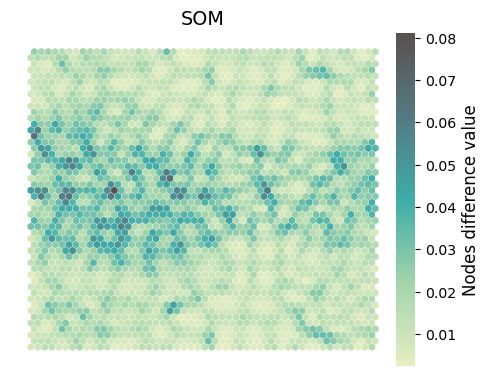

2023-12-01 17:14:45.578 | INFO     | simpsom.network:plot_map_by_difference:751 - Node difference map will be saved to:
././som_difference.png


In [11]:
_ = net.plot_map_by_difference(show=True, print_out=True,
    cmap=pylette)

In [12]:
projection = net.project_onto_map(scaled_df_v2.values)
projection

2023-12-01 17:14:47.136 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
././som_projected.npy


array([[13.      , 20.784609],
       [47.5     , 28.578838],
       [13.5     , 30.310888],
       ...,
       [28.5     , 28.578838],
       [ 0.      , 10.392304],
       [17.5     , 25.114737]], dtype=float32)

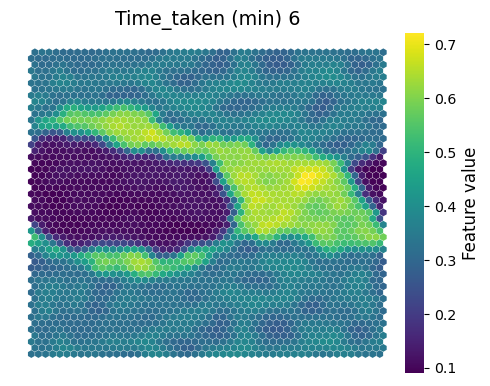

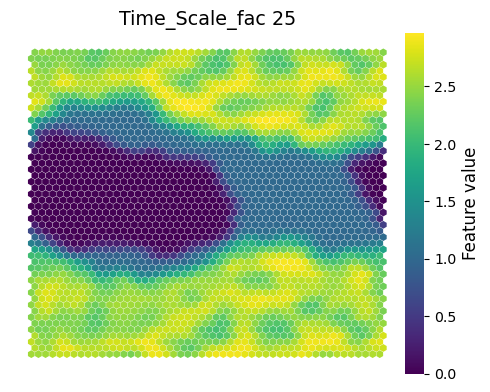

In [13]:
for i in [6,25]:
  net.plot_map_by_feature(feature_ix=i, show=True, print_out=False, title=scaled_df_v2.columns[i]+' '+str(i))

In [14]:
labs, points = net.cluster(scaled_df_v2.values, algorithm='KMeans', n_clusters=3)

2023-12-01 17:14:53.321 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
2023-12-01 17:14:54.532 | WARNING  | simpsom.network:cluster:638 - PBC are active. Make sure to provide a PBC-compatible custom metric if possible, or use `polygons.distance_pbc`. See the documentation for more detail.
c:\Users\Kirill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2023-12-01 17:14:54.811 | INFO     | simpsom.network:cluster:678 - Clustering results will be saved to:
././som_clusters.npy


[47.5 27.5 21.5 ... 40.5 27.  28.5]
[25.  40.5 45.  ... 35.5 24.5 41.5]
[13.  13.5  5.5 ...  8.   0.  17.5]


2023-12-01 17:14:57.090 | INFO     | simpsom.network:plot_clusters:893 - Clustering plot will be saved to:
././som_clusters.png


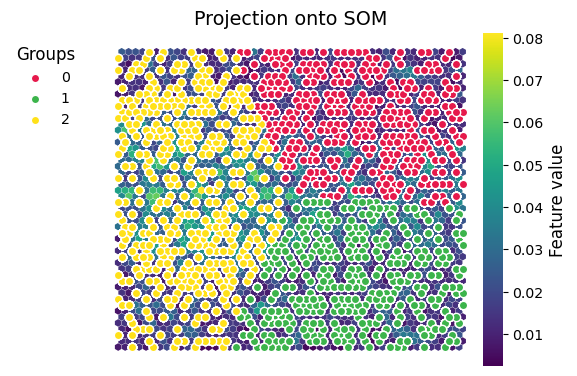

In [15]:
net.plot_clusters(points, labs, color_val=[n.difference for n in net.nodes_list])